In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

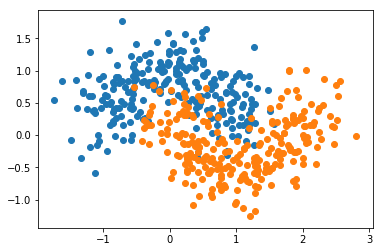

In [2]:
'''数据可视化'''
X, y = make_moons(500, noise=0.3, random_state=42)
plt.figure()
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
#使用逻辑回归，决策树，支持向量机，集成学习对moons数据进行处理
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

#y_predict = np.array(y_predict, dtype=np.int) # 将布尔量y_predict转换为整形0，1量
log_clf = LogisticRegression(solver='lbfgs')
svm_clf = SVC(gamma='scale', probability=True)
tree_clf = DecisionTreeClassifier()
vote_clf = VotingClassifier(estimators=(   # 投票，少数服从多数
    ('svc', svm_clf),
    ('tree', tree_clf),
    ('log', log_clf)), voting='soft')
# 这个循环写的很漂亮
for clf in (log_clf, svm_clf, tree_clf, vote_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
SVC 0.896
DecisionTreeClassifier 0.832
VotingClassifier 0.912


In [5]:
'''Bagging(自助采样，有放回采样) and Pasting(无放回采样)'''
'''通常来说，Bagging拥有更好的性能'''
from sklearn.ensemble import BaggingClassifier
#n_estimator 表示学习器的数量，max_sample 表示在数据集上进行有放回采样100个实例，bootstrap=1为Bagging，=0为Pasting
#n_jobs=-1 表示使用所有空闲的CPU核
'''如果基分类器可以使用分类概率(predict_probe方法)，则BaggingClassifier会自动采用软投票方式'''
'''out-of-bag
对于自助采样，有37%没有被采样的训练实例称为out-of-bag实例，注意对于每一个的分类器它们的 37% 不是相同的。因为没有在训练的时候使用oob数据，
所以可以把这些数据当成验证集测试学习器的性能。将oob_score设置为True即表示使用oob最为验证集'''
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500, max_samples=100,
                           bootstrap=True, n_jobs=-1,oob_score=True)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)  # 对测试集的准确率的评估
bag_clf.oob_score_ # 对oob验证集的准确率的评估
'''随机贴片：对训练集实例和特征的采样。随机子空间：保留所有实例，对特征进行采样'''
'''max_features(属性子空间，采样多少个属性)和bootstrap_features(与bootstrap用法类似，表示是否进行有放回的采样)'''
bag_clf.oob_decision_function_  # 输出每个实例为某一个类别的概率

array([[0.32291667, 0.67708333],
       [0.38402062, 0.61597938],
       [0.99742268, 0.00257732],
       [0.00779221, 0.99220779],
       [0.02604167, 0.97395833],
       [0.08461538, 0.91538462],
       [0.44743935, 0.55256065],
       [0.05714286, 0.94285714],
       [0.94429708, 0.05570292],
       [0.83739837, 0.16260163],
       [0.5826972 , 0.4173028 ],
       [0.04199475, 0.95800525],
       [0.74931129, 0.25068871],
       [0.85752688, 0.14247312],
       [0.88029925, 0.11970075],
       [0.07407407, 0.92592593],
       [0.02319588, 0.97680412],
       [0.92084433, 0.07915567],
       [0.69756098, 0.30243902],
       [0.96825397, 0.03174603],
       [0.03723404, 0.96276596],
       [0.27322404, 0.72677596],
       [0.8877551 , 0.1122449 ],
       [0.98721228, 0.01278772],
       [0.96363636, 0.03636364],
       [0.        , 1.        ],
       [0.96103896, 0.03896104],
       [1.        , 0.        ],
       [0.02227723, 0.97772277],
       [0.68956743, 0.31043257],
       [0.

In [6]:
'''随机森林(Random Forest)'''
'''随机森林算法在树生长时引入了额外的随机;与在节点分裂时需要找到最好分裂特征相反(决策树),
它在一个随机的特征集中找最好的特征。它导致了树的差异性,并且再一次用高偏差换低方差,总的来说是一个更好的模型。'''
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)
'''极端随机树，随机森林中只是随机抽样了属性集，在极端随机树中(Extremely Randomized Trees)，对每个属性中的划分点(阈值)也进行随机选取
可以使用API ExtraTreesClassifier() ，一般通过交叉验证判断使用随机森林还是极端随机数'''

'极端随机树，随机森林中只是随机抽样了属性集，在极端随机树中(Extremely Randomized Trees)，对每个属性中的划分点(阈值)也进行随机选取\n可以使用API ExtraTreesClassifier() ，一般通过交叉验证判断使用随机森林还是极端随机数'

In [7]:
'''特征重要性，一般重要的特征出现在决策树的根结点(信息熵高)部位，因此可以通过计算一个特征在森林的全部树中出现的平均深度来预测特征的重要性，
可以通过feature_importances_变量来查看结果'''
from sklearn.datasets import load_iris
iris_data = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris_data.data, iris_data.target)
for name, score in zip(iris_data.feature_names, rnd_clf.feature_importances_):
    print(name, score)  # 输出特征的名字和重要性
'''随机森林可以非常方便快速得了解哪些特征实际上是重要的,特别是你需要进行特征选择的时候。'''

sepal length (cm) 0.09349700286747264
sepal width (cm) 0.021205394478065423
petal length (cm) 0.4340666184136446
petal width (cm) 0.4512309842408174


'随机森林可以非常方便快速得了解哪些特征实际上是重要的,特别是你需要进行特征选择的时候。'

In [8]:
#回归线可视化
def Regression_Visualization(x, y, clf):
    plt.figure()
    y_plot = clf.predict(x)
    plt.scatter(x, y, c='r', marker='x')
    plt.scatter(x, y_plot, c='b', marker='o')
    plt.show()

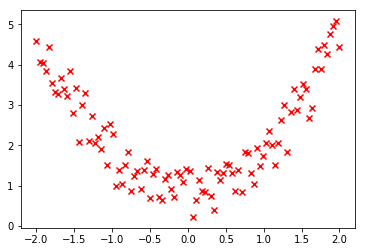

In [149]:
'''adaboosting and 梯度提升'''
'''adaboosting,使一个新的分类器去修正之前分类结果的方法,就是对之前分类结果不对的训练实例多加关
注。这导致新的预测因子(权值)越来越多地聚焦于错误分类的样本。一个重要的缺点就是:它不能被并行化(只能按步骤),
因为每个分类器只能在之前的分类器已经被训练和评价后再进行训练。'''
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                            algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
'''如果你的 Adaboost 集成过拟合了训练集,你可以尝试减少基分类器的数量或者对基分类器使用更强的正则化。'''

'''梯度提升'''
'''它并不像 Adaboost 那样每一次迭代都更改实例的权重,这个方法是去使用新的分类器去拟合前面分类器预测的残差 。'''
from sklearn.tree import DecisionTreeRegressor
square_x = np.linspace(-2, 2, 100)
square_y = square_x ** 2 + 1.5 * np.random.rand(100)  # y = x^2 加上噪声
#可视化初始数据
plt.figure()
plt.scatter(square_x, square_y, c='r', marker='x')
plt.show()
square_x = square_x.reshape(-1, 1)

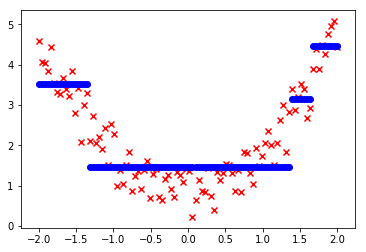

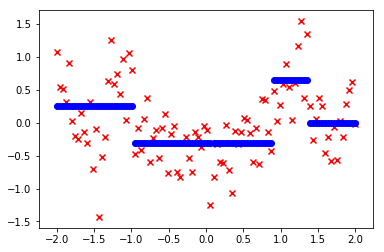

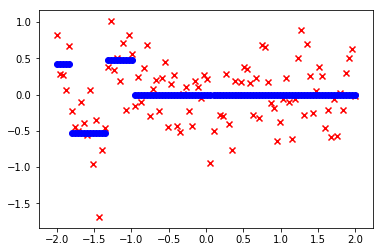

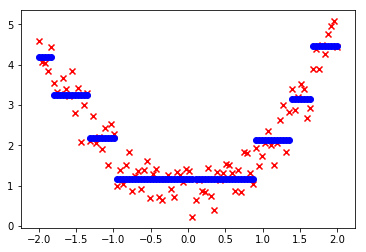

In [155]:
#第一个分类器
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(square_x, square_y)
Regression_Visualization(square_x, square_y, tree_reg1)
y2 = square_y - tree_reg1.predict(square_x)  # 得到残差

#第二个分类器
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(square_x, y2)  # 以第一个分类器输出的残差为label
Regression_Visualization(square_x, y2, tree_reg2)
y3 = y2 - tree_reg2.predict(square_x)

tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(square_x, y3)  # 以第一个分类器输出的残差为label
Regression_Visualization(square_x, y3, tree_reg3)

'''stacking 使用学习器来替代投票(即使用初学习器和次学习器)，sklearn并没有stack的API
可以看看这个开源项目https://github.com/viisar/brew'''
y_pred = sum(tree.predict(square_x) for tree in (tree_reg1, tree_reg2, tree_reg3))
plt.figure()
plt.scatter(square_x,square_y, c='r', marker='x')
plt.scatter(square_x,y_pred, c='b', marker='o')
plt.show()

from sklearn.ensemble import GradientBoostingRegressor# sklearn中的梯度提升API
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

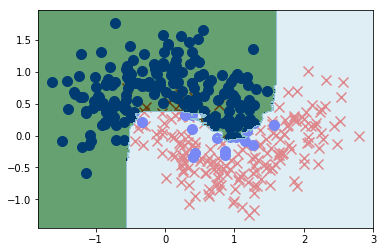

In [36]:
'''决策树边界的可视化，即使用网格数据，通过模型预测网格数据中的所有值，在通过登高线图绘制所有预测点'''
def Decision_Tree_Visualizition(X, y, clf):
    # 绘制散点图
    plt.figure()
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x', c='r', s=100, )
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o', c='b', s=100, )
    # create a mesh to plot in
    h = 0.002
    #这里的y表示的是纵坐标的y不是label
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # xx.ravel() 将多维数组变成一维数组
    Z = Z.reshape(np.array(xx.shape))
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.6)
    plt.show()
Decision_Tree_Visualizition(X_train, y_train, bag_clf)

In [13]:
#使用早停技术
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)
#gbrt是使用上一个回归器的残差来训练下一个回归器，因此每一个阶段都有一组y_pred。可以用staged_predict返回
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)] 
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)
'''上面的代码是先在一大堆树中训练,然后再回头去找最优数目。相反你也可以早早的停止训练来实现早停。你可以通过设置
warm_start=True来实现 ,这使得当fit()方法被调用时 sklearn 保留现有树,并允许增量训练。'''
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=58, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

0
1
2


0.896

0.912